# Detecting Data Anomalies

## Checking  data validity

### Relying on Interquartile Range (IQR)

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

%matplotlib inline 

In [2]:
california = fetch_california_housing(as_frame = True)
X, y = california.data, california.data
X = pd.DataFrame(X, columns=california.feature_names)
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

<AxesSubplot:>

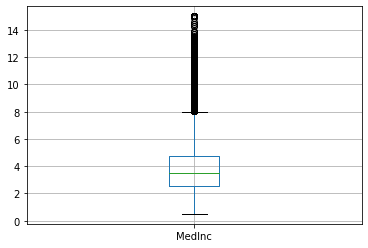

In [3]:
X.boxplot('MedInc',return_type='axes')

### Relying on Principle Component Analysis (PCA)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [5]:
print(X[["MedInc", "HouseAge"]][0:5])
print(scale(X[["MedInc", "HouseAge"]])[0:5])

   MedInc  HouseAge
0  8.3252      41.0
1  8.3014      21.0
2  7.2574      52.0
3  5.6431      52.0
4  3.8462      52.0
[[ 2.34476576  0.98214266]
 [ 2.33223796 -0.60701891]
 [ 1.7826994   1.85618152]
 [ 0.93296751  1.85618152]
 [-0.012881    1.85618152]]


In [6]:
pca = PCA(n_components=2)
pca.fit(scale(X))
C = pca.transform(scale(X))
print(C)
print("Original Shape: ", X.shape)
print("Transformed Shape: ", C.shape)

[[ 1.88270434 -0.50336186]
 [ 1.37111955 -0.12140565]
 [ 2.08686762 -0.5011357 ]
 ...
 [ 1.40235696 -1.09642559]
 [ 1.5429429  -1.05940835]
 [ 1.40551621 -0.89672727]]
Original Shape:  (20640, 8)
Transformed Shape:  (20640, 2)


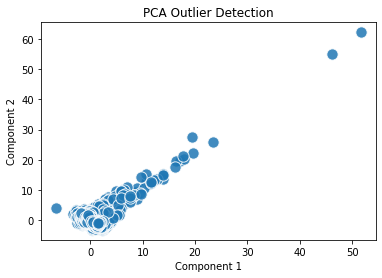

In [7]:
plt.title('PCA Outlier Detection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(C[:,0],C[:,1], s=2**7, edgecolors='white',
            alpha=0.85, cmap='autumn')
plt.grid(which='minor', axis='both')
plt.show()

### Relying on Cook’s Distance

In [8]:
modules = !pip list
installed = False

for item in modules:
    if ('yellowbrick' in item):
        print('Yellowbrick installed: ', item)
        installed = True
        
if not installed:
    print('Installing Yellowbrick...')
    !pip install yellowbrick

Yellowbrick installed:  yellowbrick                        1.5


In [9]:
from yellowbrick.regressor import CooksDistance

In [10]:
california = fetch_california_housing(as_frame = True)
X = california.data["MedInc"].values.reshape(-1, 1)
y = range(len(X))

In [11]:
print(X)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [1.7   ]
 [1.8672]
 [2.3886]]


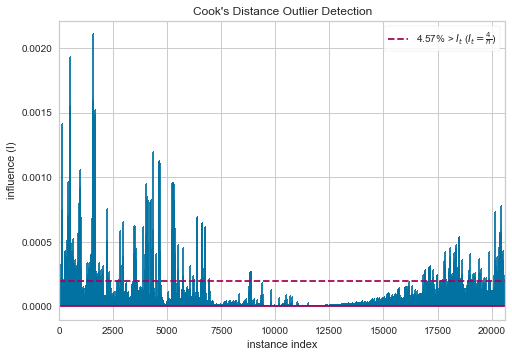

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [12]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

### Relying on Z-Score

In [13]:
import numpy as np
import seaborn as sns

In [14]:
X = california.data["MedInc"]

In [15]:
mean = np.mean(X)
std = np.std(X)
print('Mean of the dataset is: ', mean)
print('Standard deviation is: ', std)

Mean of the dataset is:  3.8706710029070246
Standard deviation is:  1.899775694574878


In [16]:
threshold = 3
record = 1
z_scores = []
for i in X:
    z = (i - mean) / std
    z_scores.append(z)
    if z > threshold:
        print('Record: ', record, ' value: ', i)
    record = record + 1

Record:  132  value:  11.6017
Record:  410  value:  10.0825
Record:  511  value:  11.8603
Record:  512  value:  13.499
Record:  513  value:  12.2138
Record:  515  value:  12.3804
Record:  924  value:  9.7194
Record:  978  value:  10.9506
Record:  987  value:  10.3203
Record:  1542  value:  9.5862
Record:  1562  value:  9.7037
Record:  1564  value:  10.3345
Record:  1565  value:  12.5915
Record:  1567  value:  15.0001
Record:  1575  value:  9.8708
Record:  1583  value:  10.7372
Record:  1584  value:  13.4883
Record:  1587  value:  12.2478
Record:  1592  value:  10.4549
Record:  1594  value:  10.3224
Record:  1603  value:  10.3713
Record:  1618  value:  11.7064
Record:  1622  value:  11.3421
Record:  1637  value:  10.9405
Record:  1638  value:  10.3416
Record:  1645  value:  10.5815
Record:  1646  value:  13.2949
Record:  1647  value:  13.1499
Record:  2214  value:  10.5144
Record:  2827  value:  10.0263
Record:  2970  value:  10.5941
Record:  3487  value:  10.8805
Record:  3534  value: 

Record:  20427  value:  10.0472
Record:  20437  value:  12.542


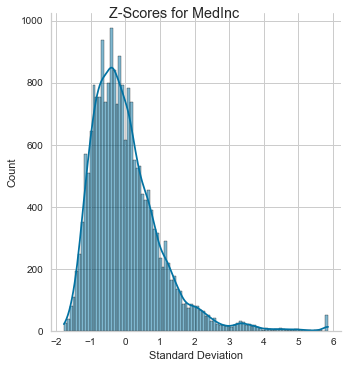

In [18]:
axes = sns.displot(z_scores, kde=True)
axes.fig.suptitle('Z-Scores for MedInc')
axes.set(xlabel='Standard Deviation')